In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
import numpy as np
import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

# logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

# random forest classifier
from sklearn.ensemble import RandomForestClassifier


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
# load in data
columns = ["ID", "age", "sex", "education", "country", "ethinicity", "Nscore", "Escore",
           "Oscore", "Ascore", "Cscore", "impulsive", "SS", "alcohol", "amphet", "amyl",
           "benzos", "caff", "cannabis", "chocolate", "cocaine", "crack", "ecstasy", "heroin",
           "ketamine", "legalh", "LSD", "meth", "mushrooms", "nicotine", "semer", "VSA"]

df_drug = pd.read_csv("drug_consumption.data", names=columns)
df_drug.head()

,ID,age,sex,education,country,ethinicity,Nscore,Escore,Oscore,Ascore,...,ecstasy,heroin,ketamine,legalh,LSD,meth,mushrooms,nicotine,semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [3]:
# set female to 0, male to 1
df_drug['sex'] = df_drug['sex'].mask(
    df_drug['sex'] == 0.48246, 0).mask(df_drug['sex'] == -0.48246, 1)

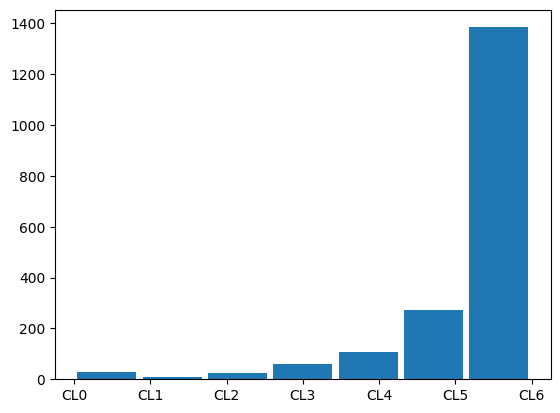

In [4]:
def create_hist(col, df_drug):

    # order for x-axis labels
    order = ["CL0", "CL1", "CL2", "CL3", "CL4", "CL5", "CL6"]

    # sort df
    df_drug[col] = pd.Categorical(
        df_drug[col], categories=order, ordered=True)
    df_drug = df_drug.sort_values(by=col)

    # histogram
    plt.hist(df_drug[col], bins=len(order), rwidth=0.9)
    plt.xticks(range(len(order)), order)
    plt.show()


create_hist("caff", df_drug)

In [5]:
ls_drugs = ["alcohol", "amphet", "amyl",
            "benzos", "caff", "cannabis", "chocolate", "cocaine", "crack", "ecstasy", "heroin",
            "ketamine", "legalh", "LSD", "meth", "mushrooms", "nicotine",  "VSA"]

all_drugs =  ["alcohol", "amphet", "amyl",
            "benzos", "caff", "cannabis", "chocolate", "cocaine", "crack", "ecstasy", "heroin",
            "ketamine", "legalh", "LSD", "meth", "mushrooms", "nicotine","semer", "VSA"]

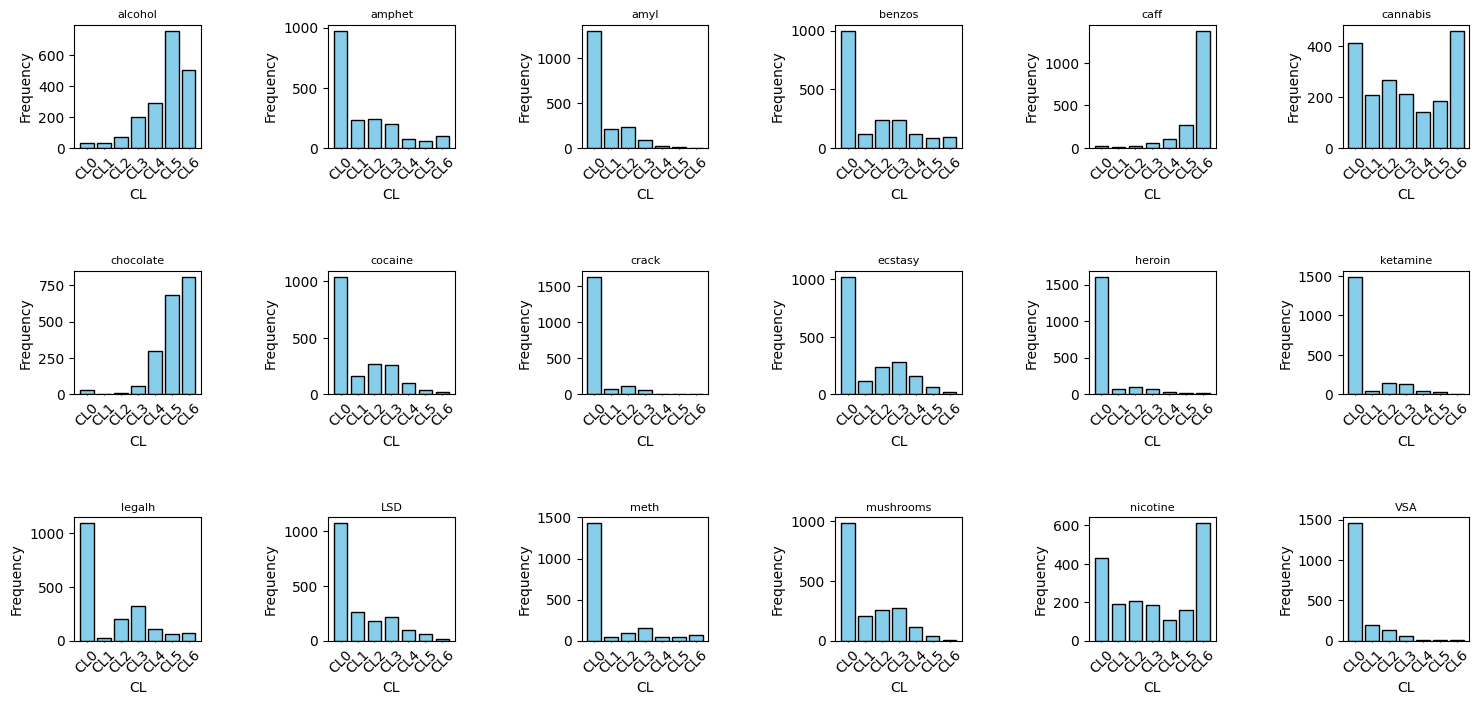

In [6]:
bins = np.linspace(0, 50, 51)
order = ["CL0", "CL1", "CL2", "CL3", "CL4", "CL5", "CL6"]

# set up figure
fig, axes = plt.subplots(3, 6, figsize=(18, 8)) 

# iterate through drugs
for idx, drug in enumerate(ls_drugs):
    row = idx // 6
    col = idx % 6

    ax = axes[row, col]

    # frequency of each category for current drug
    drug_counts = df_drug[drug].value_counts().reindex(order, fill_value=0)

    # bar chart showing frequency of each category
    ax.bar(drug_counts.index, drug_counts.values, color='skyblue', edgecolor='k')
    ax.set_xlabel("CL")
    ax.set_ylabel("Frequency")
    ax.set_title(drug, fontsize=8, pad=5)
    ax.tick_params(axis='x', rotation=45, size = 1) 

# adjust layout
plt.subplots_adjust(hspace=1, wspace = 1)
plt.show()

In [7]:
# remove 'CL' from label
for x in all_drugs:
    if x in df_drug.columns:
        df_drug[x] = df_drug[x].str.strip().str.replace('CL', '')

In [8]:
# convert to integers for each drug value
for column in df_drug.columns:
    df_drug[column] = df_drug[column].astype(float)

In [9]:
df_drug['avg drug frequency'] = df_drug[ls_drugs].mean(axis=1)

In [10]:
df_drug.head()

,ID,age,sex,education,country,ethinicity,Nscore,Escore,Oscore,Ascore,...,heroin,ketamine,legalh,LSD,meth,mushrooms,nicotine,semer,VSA,avg drug frequency
0,1.0,0.49788,0.0,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.222222
1,2.0,-0.07854,1.0,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,0.0,2.0,0.0,2.0,3.0,0.0,4.0,0.0,0.0,2.388889
2,3.0,0.49788,1.0,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.111111
3,4.0,-0.95197,0.0,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.333333
4,5.0,0.49788,0.0,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,0.0,0.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0,1.500000


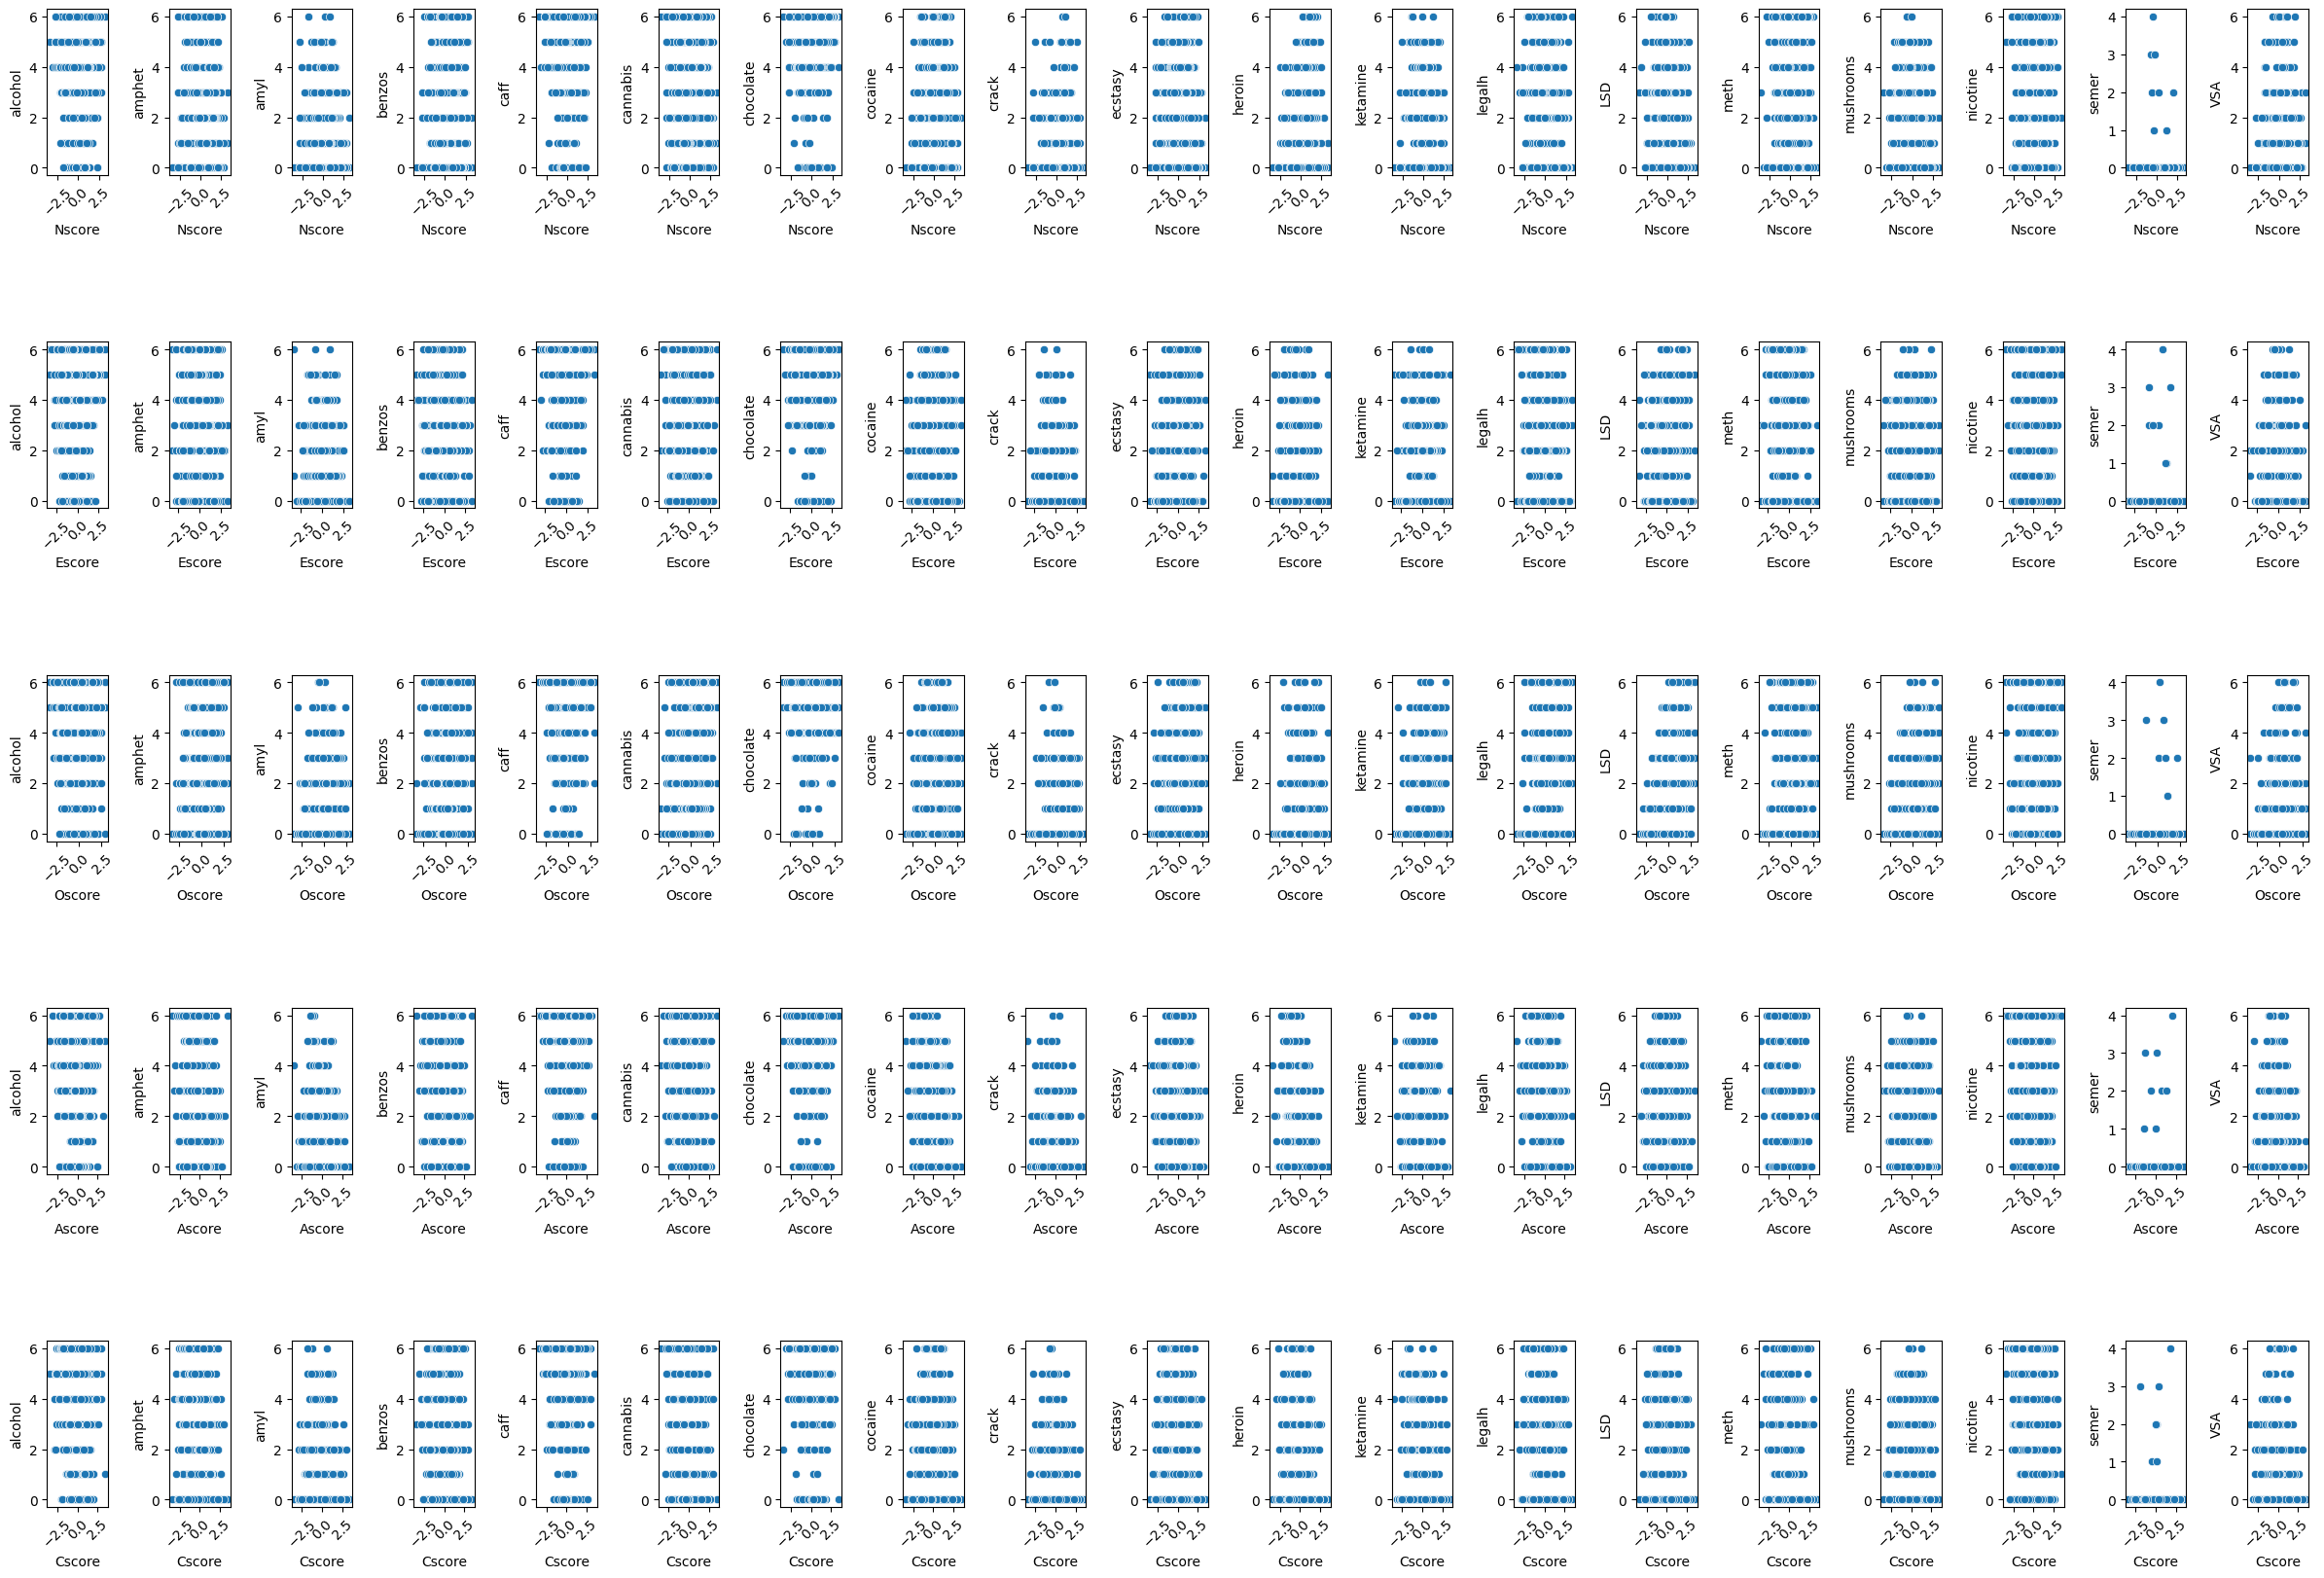

In [11]:
df = df_drug

# list of personality score columns
personality_scores = ['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore']

# list of drug columns
drug_columns = ['alcohol', 'amphet', 'amyl', 'benzos', 'caff', 'cannabis', 'chocolate', 'cocaine',
                'crack', 'ecstasy', 'heroin', 'ketamine', 'legalh', 'LSD', 'meth', 'mushrooms',
                'nicotine', 'semer', 'VSA']

# subplots for personality scores vs. each drug
fig, axes = plt.subplots(nrows=len(personality_scores), ncols=len(drug_columns), figsize=(30, 20))
fig.subplots_adjust(wspace=1, hspace=1)

for i, personality_score in enumerate(personality_scores):
    for j, drug in enumerate(drug_columns):
        sns.scatterplot(x=personality_score, y=drug, data=df, ax=axes[i, j])
        #axes[i, j].set_title(f'{personality_score} vs {drug}', fontsize=8)
        axes[i, j].set_xlabel(personality_score)
        axes[i, j].set_ylabel(drug)
        axes[i, j].tick_params(axis='x', labelrotation=45)

# Logistic Regression

In [12]:
def perform_logistic_regression(df, columns, threshold=3):
    results = []

    for column in columns:
        # subset where drug value is greater than or equal to the threshold
        df_sub = df[df[column] >= threshold]

        # test on only personality categories (not age and sex)
        X = df_sub[['Nscore', 'Ascore', 'Cscore', 'Escore', 'Oscore']]
        y = df_sub[column]

        # make sure there are at least two classes in target variable
        if len(y.unique()) > 1:
            # split into training and testing 
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

            # build LogisticRegression model
            model = LogisticRegression(multi_class='auto', solver='liblinear')

            # fit model on training data
            model.fit(X_train, y_train)

            # make predictions with testing data
            y_pred = model.predict(X_test)

            # evaluate model
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
            recall = recall_score(y_test, y_pred, average='weighted')
            f1 = f1_score(y_test, y_pred, average='weighted')

            # calculate percentages
            accuracy_percentage = (accuracy * 100)
            precision_percentage = (precision * 100)
            recall_percentage = (recall * 100)
            f1_percentage = (f1 * 100)

            # cross validate
            cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
            cross_val_results = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

            # get feature importance
            feature_importance = model.coef_[0]

            # store resutls
            result = {
                'Column': column,
                'Accuracy (%)': accuracy_percentage,
                'Precision (%)': precision_percentage,
                'Recall (%)': recall_percentage,
                'F1 Score (%)': f1_percentage,
                'Cross-Val Accuracy': cross_val_results.mean(),
                'Feature Importance (Nscore)': feature_importance[0],
                'Feature Importance (Ascore)': feature_importance[1],
                'Feature Importance (Cscore)': feature_importance[2],
                'Feature Importance (Escore)': feature_importance[3],
                'Feature Importance (Oscore)': feature_importance[4],
            }
            results.append(result)
        else:
            print(f"Not enough classes in {column} with drug value >= {threshold}")

    # create dataframe from results
    results_df = pd.DataFrame(results)
    return results_df


results = perform_logistic_regression(df_drug, ls_drugs, threshold=3)

"""for result in results:
    print(f"Logistic Regression for Column: {result['Column']}")
    print("Accuracy:", result['Accuracy'])
    print("Precision:", result['Precision'])
    print("Recall:", result['Recall'])
    print("F1 Score:", result['F1 Score'])
    print("Confusion Matrix:")
    print(result['Confusion Matrix'])
    print()"""

results

/Users/madelynredick/.pyenv/versions/3.11.1/lib/python3.11/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/madelynredick/.pyenv/versions/3.11.1/lib/python3.11/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/Users/madelynredick/.pyenv/versions/3.11.1/lib/python3.11/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/madelynredick/.pyenv/versions/3.11.1/lib/python3.11/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


,Column,Accuracy (%),Precision (%),Recall (%),F1 Score (%),Cross-Val Accuracy,Feature Importance (Nscore),Feature Importance (Ascore),Feature Importance (Cscore),Feature Importance (Escore),Feature Importance (Oscore)
0,alcohol,44.290657,29.281356,44.290657,32.130783,0.430523,-0.153767,-0.050975,-0.106647,-0.404583,-0.012827
1,amphet,47.222222,54.250356,47.222222,35.257822,0.451803,-0.028086,0.217305,0.066953,-0.089094,0.219954
2,amyl,70.454545,79.183884,70.454545,58.242424,0.684330,0.571651,0.027452,0.130931,0.417316,0.054807
3,benzos,41.242938,30.257779,41.242938,32.406453,0.441121,-0.400080,0.139662,0.085490,0.049156,0.083627
4,caff,75.083056,81.291597,75.083056,64.397612,0.759321,-0.361110,0.014686,-0.130916,-0.299941,-0.024789
5,cannabis,44.545455,61.729798,44.545455,29.620793,0.472472,0.191660,0.120345,0.117593,0.049409,-0.455823
6,chocolate,42.927632,51.916090,42.927632,36.980226,0.436957,-0.027868,0.058177,-0.103149,-0.068489,0.084937
7,cocaine,59.420290,51.216545,59.420290,44.835310,0.618703,-0.373940,0.005688,-0.119886,-0.240466,0.331891
8,crack,88.888889,89.173789,88.888889,87.145969,0.734167,-0.436944,0.533338,-0.205242,0.216591,0.248120
9,ecstasy,50.877193,75.149639,50.877193,34.941230,0.524122,0.159080,0.192427,-0.016270,0.064720,-0.089919


In [13]:
# correlation matrices
for column in ls_drugs:
    df_sub = df_drug[df_drug[column] >= 3]
    correlation_matrix = df_sub[['Nscore', 'Ascore', 'Cscore', 'Escore', 'Oscore']].corr()
    print(f"\nCorrelation Matrix for {column} (Drug Value >= 3):\n")
    print(correlation_matrix)


Correlation Matrix for alcohol (Drug Value >= 3):

          Nscore    Ascore    Cscore    Escore    Oscore
Nscore  1.000000 -0.210523 -0.379090 -0.422298  0.020003
Ascore -0.210523  1.000000  0.242653  0.157302  0.030118
Cscore -0.379090  0.242653  1.000000  0.299157 -0.064640
Escore -0.422298  0.157302  0.299157  1.000000  0.255142
Oscore  0.020003  0.030118 -0.064640  0.255142  1.000000

Correlation Matrix for amphet (Drug Value >= 3):

          Nscore    Ascore    Cscore    Escore    Oscore
Nscore  1.000000 -0.212743 -0.419365 -0.433783 -0.132041
Ascore -0.212743  1.000000  0.181717  0.159032  0.205472
Cscore -0.419365  0.181717  1.000000  0.266063  0.148685
Escore -0.433783  0.159032  0.266063  1.000000  0.341769
Oscore -0.132041  0.205472  0.148685  0.341769  1.000000

Correlation Matrix for amyl (Drug Value >= 3):

          Nscore    Ascore    Cscore    Escore    Oscore
Nscore  1.000000 -0.097609 -0.361107 -0.414439  0.015451
Ascore -0.097609  1.000000  0.139137  0.145030  0.

# Decision Tree

In [14]:
X = df[['Nscore', 'Ascore', 'Cscore', 'Escore', 'Oscore']]
y = df['crack']  # using crack as target variable

# split into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# build Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42, max_depth = 5)

# fit model on training data
decision_tree_model.fit(X_train, y_train)

# make predictions with testing data
y_pred_decision_tree = decision_tree_model.predict(X_test)

# evaluate model
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
precision_decision_tree = precision_score(y_test, y_pred_decision_tree, average='weighted', zero_division=1)
recall_decision_tree = recall_score(y_test, y_pred_decision_tree, average='weighted')
f1_decision_tree = f1_score(y_test, y_pred_decision_tree, average='weighted')
confusion_mat_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)

# print evaluation metrics
print("Decision Tree Classifier:")
print("Accuracy:", accuracy_decision_tree)
print("Precision:", precision_decision_tree)
print("Recall:", recall_decision_tree)
print("F1 Score:", f1_decision_tree)
print("Confusion Matrix:")
print(confusion_mat_decision_tree)

Decision Tree Classifier:
Accuracy: 0.8523274478330658
Precision: 0.8573650665844056
Recall: 0.8523274478330658
F1 Score: 0.7968855063001257
Confusion Matrix:
[[531   8   0   0   0   0   0]
 [ 16   0   0   0   0   0   0]
 [ 41   1   0   0   0   0   0]
 [ 19   0   0   0   0   0   0]
 [  4   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0]]


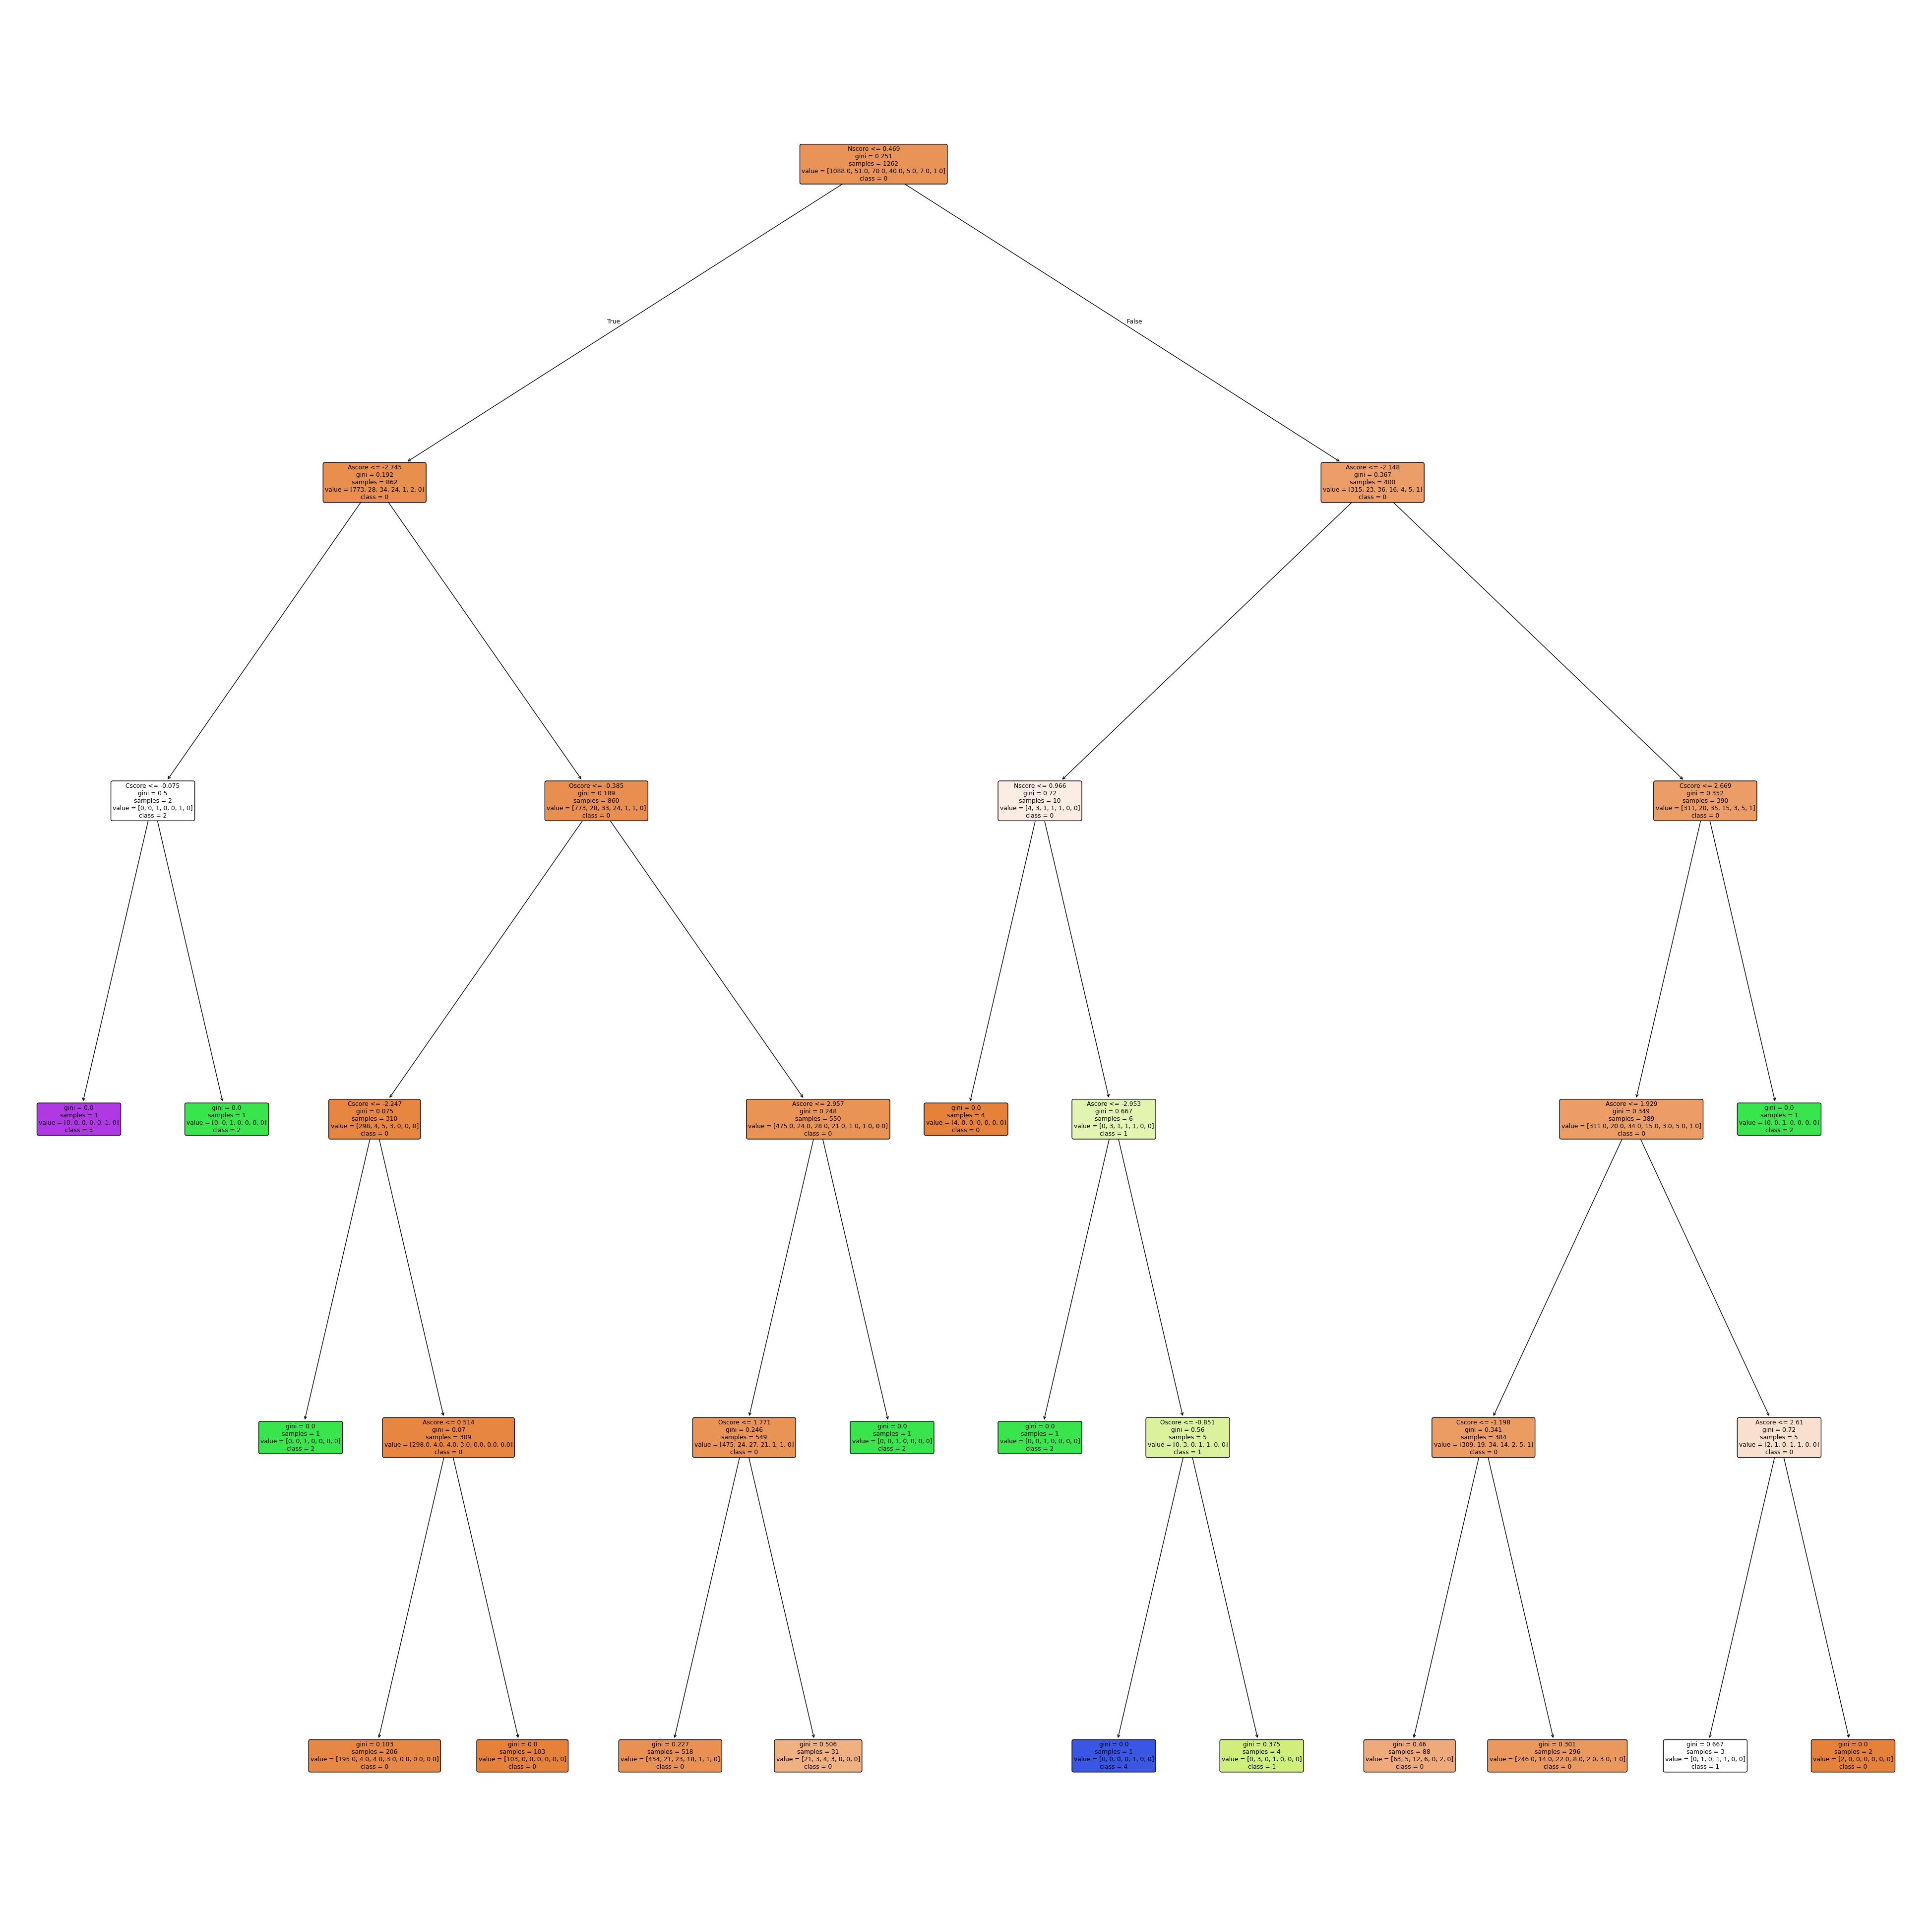

In [15]:
# define class names
class_names = ['0', '1', '2', '3', '4', '5', '6']

# # visualize decision tree
plt.figure(figsize=(50, 50))
plot_tree(decision_tree_model, feature_names=['Nscore', 'Ascore', 'Cscore', 'Escore', 'Oscore'], class_names=class_names, filled=True, rounded=True)
plt.show()


# Random Forest Classifier

In [16]:
# build Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)

# fit model on training data
random_forest_model.fit(X_train, y_train)

# make predictions with testing data
y_pred_random_forest = random_forest_model.predict(X_test)

# evaluate model
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
precision_random_forest = precision_score(y_test, y_pred_random_forest, average='weighted', zero_division=1)
recall_random_forest = recall_score(y_test, y_pred_random_forest, average='weighted')
f1_random_forest = f1_score(y_test, y_pred_random_forest, average='weighted')
confusion_mat_random_forest = confusion_matrix(y_test, y_pred_random_forest)

# print evaluation metrics
print("\nRandom Forest Classifier:")
print("Accuracy:", accuracy_random_forest)
print("Precision:", precision_random_forest)
print("Recall:", recall_random_forest)
print("F1 Score:", f1_random_forest)
print("Confusion Matrix:")
print(confusion_mat_random_forest)


Random Forest Classifier:
Accuracy: 0.8603531300160514
Precision: 0.8571014342670741
Recall: 0.8603531300160514
F1 Score: 0.8002249129916337
Confusion Matrix:
[[536   3   0   0   0   0   0]
 [ 16   0   0   0   0   0   0]
 [ 42   0   0   0   0   0   0]
 [ 19   0   0   0   0   0   0]
 [  4   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0]]
